# Summary Statistics of Failed Zones

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
def my_read_file(num):
    '''This function is for reading in the csv's and panda data frames
    '''
    filename = "fail_data_" + str(num) + ".csv"
    data = pd.read_csv(filename)
    return data
num = 0
df = my_read_file(num)
df.tail(3)

,volume,aspectRatio,conditionNumber,distortion,jacobian,largestAngle,oddy,scaledJacobian,shape,shapeAndSize,shear,shearAndSize,skew,smallestAngle,stretch,taper
6897,0.015525,6.940120,5.000000e+29,-0.170555,-0.000283,181.495499,30978.369141,-0.026098,0.0,0.0,0.0,0.0,0.984267,1.421640,0.152630,0.270663
6898,0.015525,6.940646,5.000000e+29,-0.171097,-0.000284,181.499924,31150.931641,-0.026176,0.0,0.0,0.0,0.0,0.984274,1.417794,0.152623,0.270689
6899,0.015524,6.941177,5.000000e+29,-0.171633,-0.000285,181.504303,31324.029297,-0.026252,0.0,0.0,0.0,0.0,0.984281,1.413967,0.152615,0.270716


Cycles after peak of oddy spike until failure for failed zones as a distribution

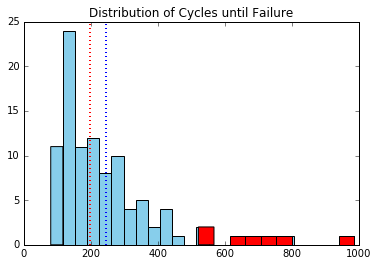

Number of Runs:  99
Outlier Index:  [6, 35, 43, 44, 74, 75, 89]
Outlier Values [720, 551, 673, 794, 521, 637, 987]
Mean:  245.04040404
Median  198.0
Standard Deviation:  158.929113173
Variance:  25258.463014


In [3]:
ttf= list()
outliers = list()
outlier_values = list()
for i in range(0,99):
    df = my_read_file(i)
    ttf.append(df.shape[0] - df.oddy.idxmax())
    if ttf[i] > 500:
        outliers.append(i)
        outlier_values.append(ttf[i])
    

plt.hist(ttf,bins = 25,color = 'skyblue')
plt.hist(outlier_values,color = 'red')
plt.axvline(ymin=0, ymax=25, x=np.mean(ttf), linewidth=2, color = 'blue',ls = 'dotted')
plt.axvline(ymin=0, ymax=25, x=np.median(ttf), linewidth=2, color = 'red',ls = 'dotted')
title = 'Distribution of Cycles until Failure'
plt.title(title)
plt.show()

print('Number of Runs: ',len(ttf))
print('Outlier Index: ',outliers)
print("Outlier Values",outlier_values)
print('Mean: ',np.mean(ttf))
print('Median ',np.median(ttf))
print('Standard Deviation: ',np.array(ttf).std())
print('Variance: ', np.array(ttf).var())

In [4]:
ttf[0]

261

In [5]:
print(df.head(3))

     volume  aspectRatio  conditionNumber  distortion  jacobian  largestAngle  \
0  0.057430     2.533582         1.478897    0.986437  0.004679     91.967216   
1  0.057620     2.520209         1.475037    0.984659  0.004685     91.958221   
2  0.057686     2.512408         1.471552    0.984767  0.004691     91.882034   

       oddy  scaledJacobian     shape  shapeAndSize     shear  shearAndSize  \
0  2.374275        0.999411  0.676179      0.676179  0.999411      0.999411   
1  2.351469        0.999416  0.677949      0.677949  0.999416      0.999416   
2  2.330933        0.999461  0.679554      0.679554  0.999461      0.999461   

       skew  smallestAngle   stretch     taper  
0  0.007068      88.184753  0.516487  0.026045  
1  0.005054      88.248924  0.518580  0.027539  
2  0.004016      88.324478  0.520149  0.027258  


### Developing a rule to determine oddy spike preemptively

In [6]:
xx = np.array(df.oddy)
xx.shape
print('std: ',xx[:10].std(),'\n' \
     'mean: ',xx[:10].mean(),'\n'
     'diff: ',xx[11] - xx[:10].mean())

std:  0.0284111811111 
mean:  2.31274244785 
diff:  -0.025611615182


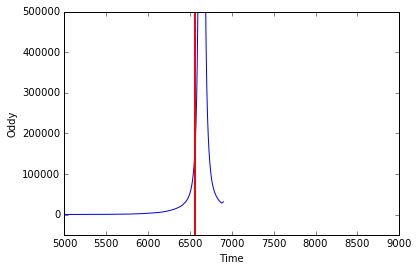

Spike begins at:  6560
Actual TTF:  261
Ruled Based TTF:  340
Difference:  79 



In [25]:
val = 0
df = my_read_file(val)
xx = np.array(df.oddy)

rule= False
t = 10
std_rule = 16
group_std = 0 #standard deviation of the values for all cycles up to point but including t

while rule!=True:
    group_std = xx[:t].std()
    group_mean = xx[:t].mean()
    diff = xx[t+1] - group_mean

    if t == len(xx):#exit loop if reach end of run
        print("rule didn't apply")
        break
    elif diff > (group_std * std_rule):
        rule = True
    else: t += 1

#here is a plot of the spike to verify that our rule is reasonable

x = range(0,df.shape[0])
y = df["oddy"]
plt.plot(x,y)
plt.xlabel("Time")
plt.ylabel("Oddy")
plt.axvline(ymin=0, ymax=500000, x=t, linewidth=2, color = 'red')

plt.xlim([5000,9000])
plt.ylim([-50000,500000])
plt.show()

print('Spike begins at: ',t)
print('Actual TTF: ',ttf[val])
print('Ruled Based TTF: ',len(xx)-t)
print('Difference: ', (len(xx)-t) -  ttf[val] ,'\n')

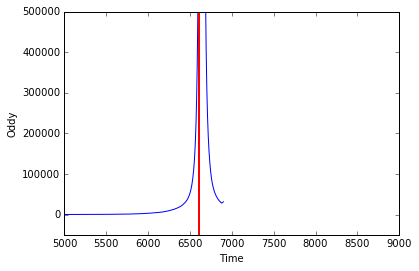

Spike begins at:  6605
Actual TTF:  261
Ruled Based TTF:  295
Difference:  34 



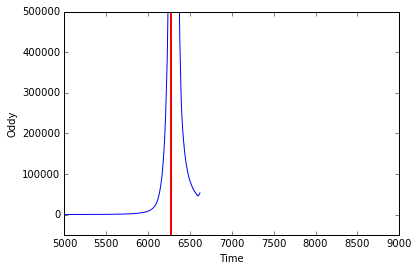

Spike begins at:  6274
Actual TTF:  316
Ruled Based TTF:  346
Difference:  30 



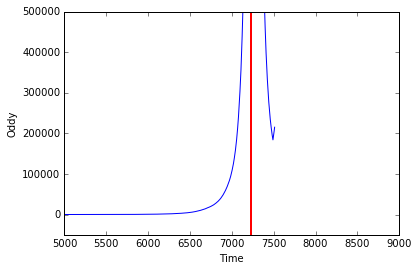

Spike begins at:  7223
Actual TTF:  253
Ruled Based TTF:  289
Difference:  36 



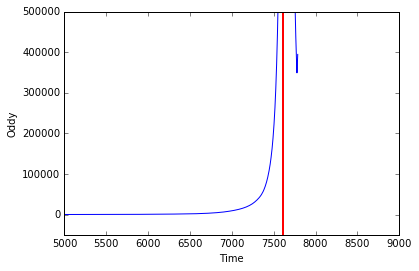

Spike begins at:  7613
Actual TTF:  136
Ruled Based TTF:  175
Difference:  39 



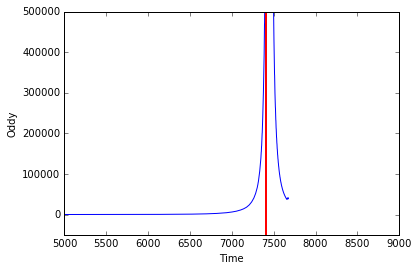

Spike begins at:  7406
Actual TTF:  229
Ruled Based TTF:  267
Difference:  38 



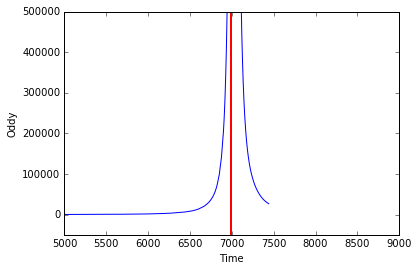

Spike begins at:  6989
Actual TTF:  417
Ruled Based TTF:  453
Difference:  36 



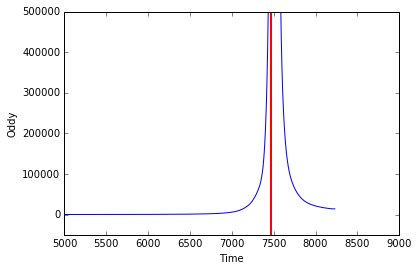

Spike begins at:  7471
Actual TTF:  720
Ruled Based TTF:  760
Difference:  40 



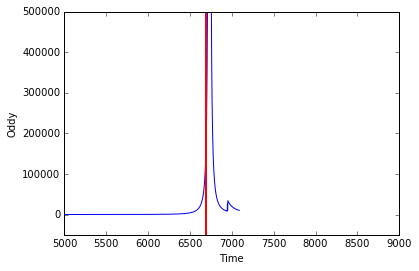

Spike begins at:  6697
Actual TTF:  358
Ruled Based TTF:  393
Difference:  35 



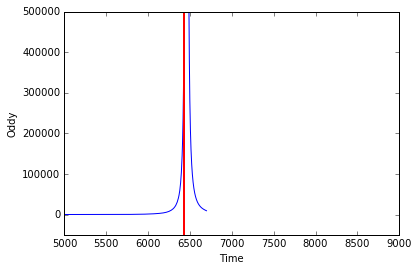

Spike begins at:  6424
Actual TTF:  240
Ruled Based TTF:  274
Difference:  34 



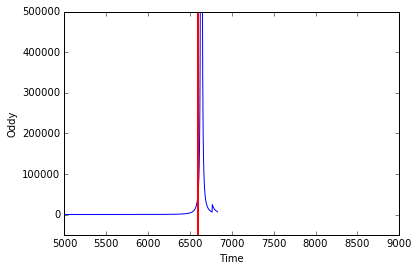

Spike begins at:  6601
Actual TTF:  195
Ruled Based TTF:  230
Difference:  35 



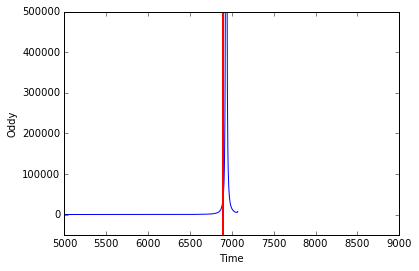

Spike begins at:  6895
Actual TTF:  138
Ruled Based TTF:  176
Difference:  38 



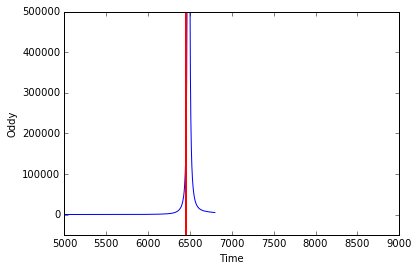

Spike begins at:  6447
Actual TTF:  316
Ruled Based TTF:  351
Difference:  35 



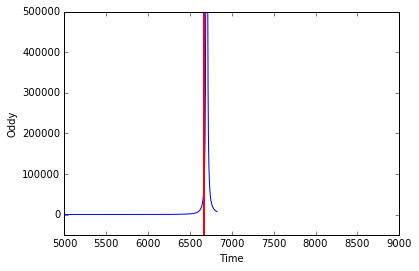

Spike begins at:  6664
Actual TTF:  124
Ruled Based TTF:  160
Difference:  36 



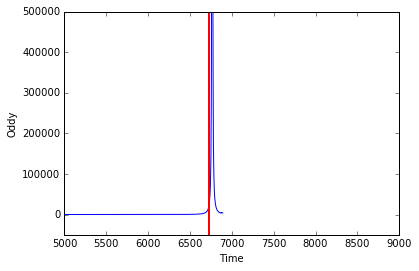

Spike begins at:  6727
Actual TTF:  127
Ruled Based TTF:  166
Difference:  39 



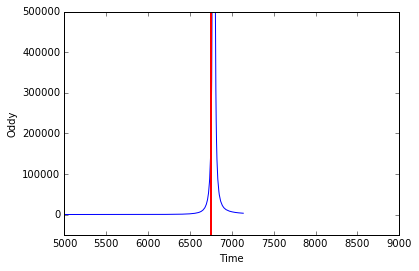

Spike begins at:  6749
Actual TTF:  354
Ruled Based TTF:  388
Difference:  34 



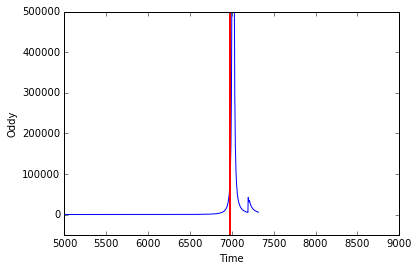

Spike begins at:  6977
Actual TTF:  302
Ruled Based TTF:  340
Difference:  38 



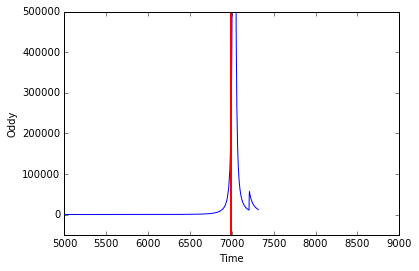

Spike begins at:  6989
Actual TTF:  291
Ruled Based TTF:  328
Difference:  37 



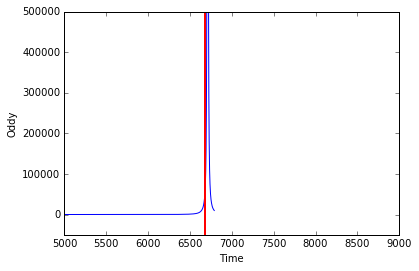

Spike begins at:  6675
Actual TTF:  80
Ruled Based TTF:  116
Difference:  36 



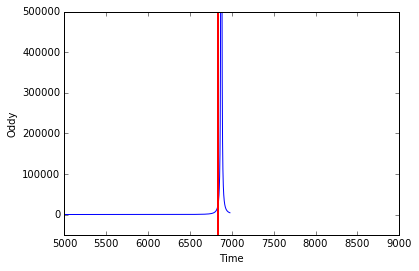

Spike begins at:  6838
Actual TTF:  104
Ruled Based TTF:  140
Difference:  36 



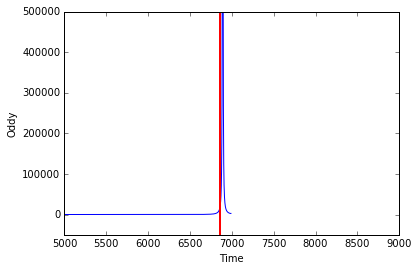

Spike begins at:  6854
Actual TTF:  100
Ruled Based TTF:  136
Difference:  36 



In [26]:
#this code loops through all failed runs
for i in range(0,20):#99):#loops through first 98 failed runs
    df = my_read_file(i)
    
    xx = np.array(df.oddy)
    rule= False
    t = 10 #start at 10 to have some 'burn-in values'
    std_rule = 26
    group_std = 0 #standard deviation of the values for all cycles up to point but including t
    while rule!=True:
        group_std = xx[:t].std()
        group_mean = xx[:t].mean()
        diff = xx[t+1] - group_mean

        if t == len(xx):#exit loop if reach end of run
            print("rule didn't apply")
            break
        elif diff > (group_std * std_rule):
            rule = True
        else: t += 1

    #here is a plot of the spike to verify that our rule is reasonable
    
    x = range(0,df.shape[0])
    y = df["oddy"]
    plt.plot(x,y)
    plt.xlabel("Time")
    plt.ylabel("Oddy")
    plt.axvline(ymin=0, ymax=500000, x=t, linewidth=2, color = 'red')
    plt.xlim([5000,9000])
    plt.ylim([-50000,500000])
    plt.show()

    print('Spike begins at: ',t)
    print('Actual TTF: ',ttf[i])
    print('Ruled Based TTF: ',len(xx)-t)
    print('Difference: ', (len(xx)-t) -  ttf[i] ,'\n')

### Everything below this point is just scratch code 

In [ ]:
#Extract wanted summary statistics for each failed zone and store it in a dictionary
spike_data = {}
spike_data['min'] = min(data['oddy'])
spike_data['max'] = max(data['oddy'])
spike_data['magnitude'] = max(data['oddy']) - min(data['oddy'])
spike_data['TTF'] = 

In [ ]:
###SCRATCH CODE###
ttf= list()
for i in range(0,52):
    df = my_read_file(i)
    ttf.append(df.shape[0] - df.oddy.idxmax())
ttf[:5]

In [ ]:
plt.hist(ttf,bins=20,histtype='step')
plt.show()

In [ ]:
type(ttf)

In [ ]:
#reading in the ID specs for the failed zones
fz = pd.read_table('failed_zones.txt',delimiter=',')
fz.tail()

In [ ]:
print(fz.shape)
run = fz['Cycle'][0]
print(run)

In [ ]:
i = 0
j = 0
fzl = list()
for i in range(0,fz.shape[0]):
        (run,cycle,zone) = (fz[fz.columns[0]][i],fz[fz.columns[1]][i],fz[fz.columns[2]][i])
        fzl.append((run,cycle,zone))

# print(fzl[:5],fzl[-5:])
(run,cycle,zone) = fzl[137]
print(run,cycle,zone,fzl[137])


In [ ]:
#removing values from a list by index
#pop,remove
blah = [1,2,3,4,5,6,7,8,9,10,11,12]
print(blah)
del blah[]
print(blah)